  <h4 style="text-align:center; font-style:italic;">Кампания лояльности по удержанию клиентов</h4> 


**Задание 1**

Text(0.5, 1.0, 'Соотношение ушедших (1) и лояльных(0) клиентов')

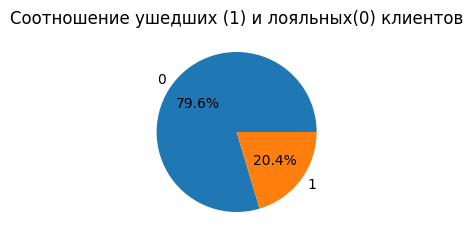

In [209]:
import matplotlib.pyplot as plt
import pandas as pd

churn_data = pd.read_csv('C:/Users/l340/Desktop/Skillfactory/PY_13_Визуализация данных/churn.csv', sep=',')
churn_data=churn_data.drop('RowNumber',axis=1)

churn_df=churn_data['Exited'].value_counts(normalize=True)
fig = plt.figure(figsize=(2, 2))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_df,
    labels=churn_df.index,
    autopct='%.1f%%',
    explode = [0, 0])
axes.set_title('Соотношение ушедших (1) и лояльных(0) клиентов',fontsize=12 )
    




*Вывод:*   
79,6 %- лояльные клиентов, 20,4 %- ушедшие клиенты. Количество лояльных клиентов почти в 4 раза больше, чем ушедших.

**Задание 2**

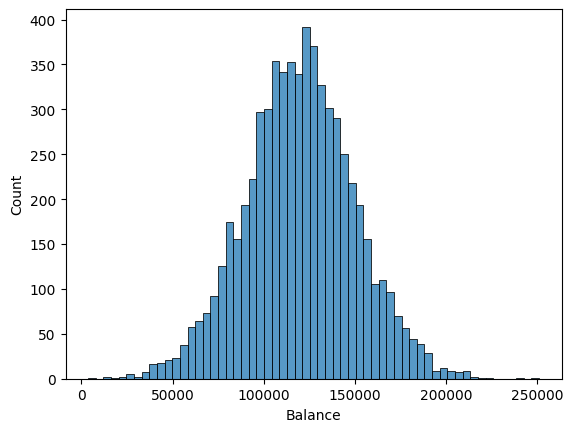

In [210]:
import seaborn as sns
mask=churn_data['Balance']>2500
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    
    
    
);

*Вывод:*  
Распределение гистограммы похоже на нормальное распределение(симметричное и с определенным максимум в центре).Баланс большинства клиентов сосредоточен в диапозоне 100 000-150 000

**Задание 3**

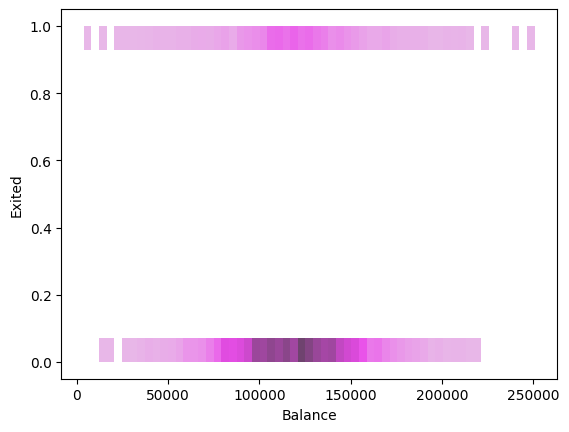

In [211]:
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    y='Exited',
    color='violet'
);

*Вывод*:  
Сумма на накопительном счёте большинства лояльных клиентов  находится в диапазоне  100 000-150 000, причем макисмальное количество лояльных клиентов находится именно в середине этого диапазона(максимальная интенсивность цвета).Градиент цвета распределен симметрично, что может подтвердить нормальное распределение.
В случае ушедших клиентов наблюдается больших разброс сумм,хотя суммы многих клиентов имеют такой же диапазон, как и у лояльных, но интенсивность гораздо ниже. 
Предположение: ушедшие клиенты предпочитают иметь различные суммы, а лояльные придерживаются определенной суммы около 125 000.

**Задание 4**

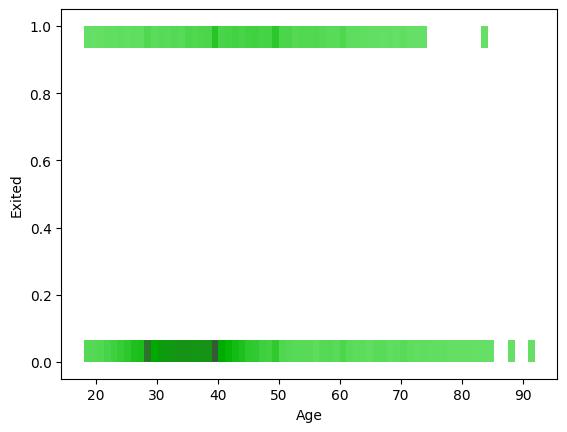

In [212]:
sns.histplot(
    data=churn_data,
    x='Age',
    y='Exited',
    color='green'
);

*Вывод*:  
Один выброс в группе ушедших клиентов и два выброса в группе лояльных, но в группе ушедших данный выброс имеет более интенсивную окраску, поэтому можно предположить, что большинство выбросов находится в группе ушедших клиентов.
Банку стоит обратить внимание на людей в возрасте от 28 до 40 лет, так же важно отметить, что большинство лояльных клиентов в возрасте 39 лет.

**Задание 5**

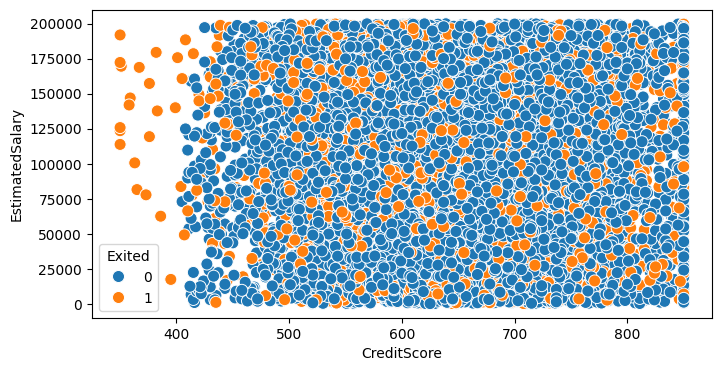

In [213]:
fig = plt.figure(figsize=(8, 4))


scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore', 
    y='EstimatedSalary', 
    s=75,
    marker='o',
    hue = 'Exited'
);

*Вывод*:  
Те, кто не набрал 400 баллов - ушедшие клиенты.Уровень предполагаемой зарплаты явно не влияет на кредитный рейтинг клиента.

**Задание 6**

Text(0.5, 1.0, 'Число ушедших клиентов')

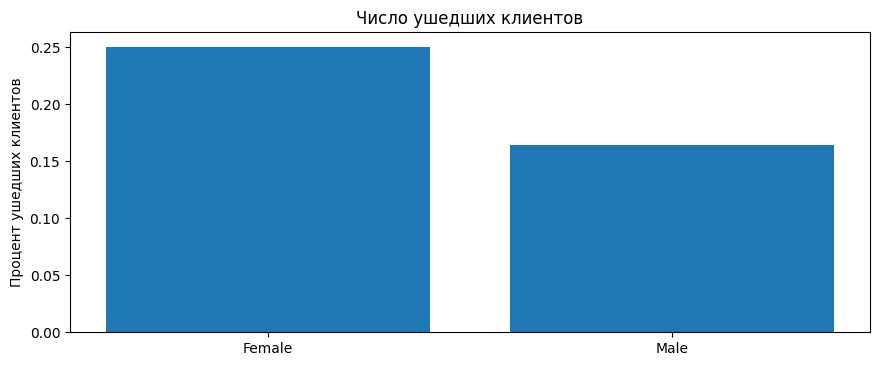

In [214]:
leaves=churn_data.groupby('Gender')['Exited'].mean()
fig = plt.figure(figsize=(8, 3))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = leaves.index, height = leaves)
main_axes.set_ylabel('Процент ушедших клиентов')
main_axes.set_title('Число ушедших клиентов')


*Вывод*:  
Чаще уходят женщины.

**Задание 7**

In [215]:
df_services = churn_data.pivot_table(index='NumOfProducts',
                                     columns='Exited',
                                     values='CustomerId',
                                     aggfunc='count',
                                     fill_value = 0
                                     )
display(df_services)

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [216]:

fig = px.bar(df_services,
             barmode='group',
             color_discrete_sequence=['blue', 'red'],
             opacity = 0.5,
             height=400
            )

fig.show()

*Вывод:*  
Чем больше приобретенных услуг, тем меньше отток клиентов. Также стоит отметить, что лояльные клиенты предпочитают брать 2 услуги.

**Задание 8**

In [217]:
df_actives = churn_data.pivot_table(index='IsActiveMember',
                                     columns='Exited',
                                     values='CustomerId',
                                     aggfunc='count',
                                     fill_value = 0
                                     )
display(df_actives)

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [218]:
fig = px.bar(df_actives,
             barmode='group',
             color_discrete_sequence=['green', 'violet'],
             opacity = 0.5,
             height=400
            )

fig.show()



*Вывод*:  
Чаще уходят клиенты, не имеющие активного статуса.
Ненавязчивая реклама услуг банка могла бы увеличить активности клиента  для  получения статуса активного клиента.

**Задание 9**

In [219]:

import plotly
import plotly.express as px
#строим график
df_country=churn_data.groupby(by="Geography", as_index=False)['Exited'].mean()
fig = px.choropleth(
    data_frame=df_country, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    width=800, #ширина
    height=500, #высота
     hover_name='Geography',
    color_continuous_scale='reds' #палитра цветов
)

#отображаем график
fig.show()

*Вывод*:  
В Германии доля ушедших клиентов больше, чем в других странах.

**Задание 10**

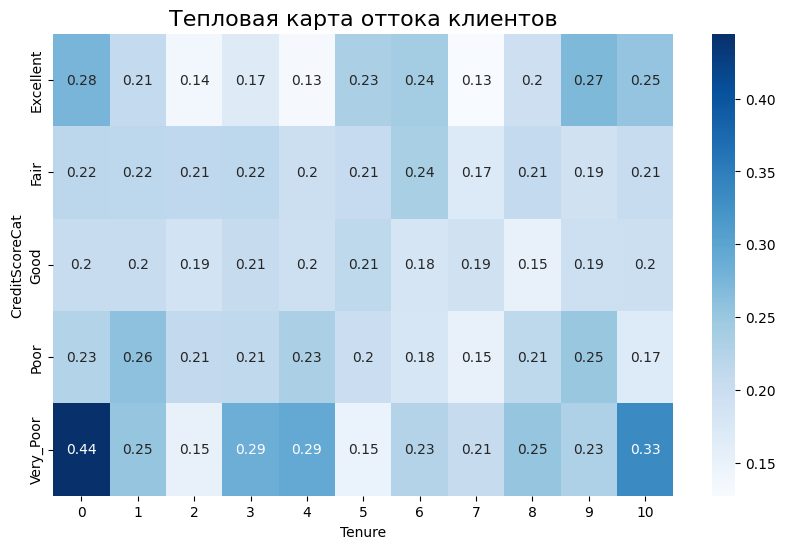

In [220]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values= 'Exited',
    index= 'CreditScoreCat',
    columns= 'Tenure',
    aggfunc= 'mean',
    fill_value=0
)   

heatmap = plt.subplots(figsize=(10, 6))
heatmap = sns.heatmap(data=pivot, cmap='Blues', annot=True,)
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16);

*Вывод*:  
Чаще всего уходят клиенты категории "very_poor",которые пользуются услугами меньше года,или больше 10 лет,а также в диапазоне 3-4 лет.
На втором месте клиенты категории "excellent" которые пользуются услугами меньше года,или больше 9 лет.